#  AI Deployment Monitoring Simulation

Simulate real-time AI model monitoring:  
- 📊 Performance metrics (Accuracy, F1, ROC-AUC)  
- 🗂️ Prediction logging for MLOps & audit trails  
- 🔎 Display recent logs for observability  
- Matches FairDeploy Dashboard functionality


In [1]:
import os
import joblib
import pandas as pd
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
import csv

# Set base directory
BASE_DIR = os.path.abspath("..")

# Load model
model_path = os.path.join(BASE_DIR, "models", "partner_model.pkl")
model = joblib.load(model_path)

# Load dataset
data_path = os.path.join(BASE_DIR, "data", "sample_dataset.csv")
df = pd.read_csv(data_path)

# Prepare features
X = df.drop(columns=['label', 'gender'])
y = df['label']


In [2]:
# Predictions
y_pred = model.predict(X)
y_prob = model.predict_proba(X)[:, 1]

# Metrics
acc = accuracy_score(y, y_pred)
f1 = f1_score(y, y_pred)
roc = roc_auc_score(y, y_prob)

# Display results
print(f"✅ Accuracy: {acc:.2f}")
print(f"✅ F1 Score: {f1:.2f}")
print(f"✅ ROC-AUC: {roc:.2f}")


✅ Accuracy: 0.99
✅ F1 Score: 0.99
✅ ROC-AUC: 1.00


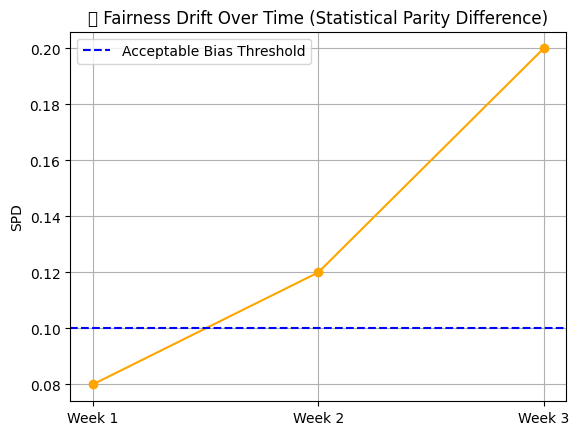

⚠️ Alert: Bias exceeded threshold at 0.20. Consider retraining or mitigation.


In [10]:
import matplotlib.pyplot as plt

# Simulate drift
fairness_over_time = {
    'time': ['Week 1', 'Week 2', 'Week 3'],
    'SPD': [0.08, 0.12, 0.20]
}
df_drift = pd.DataFrame(fairness_over_time)

# Plot drift
plt.plot(df_drift['time'], df_drift['SPD'], marker='o', color='orange')
plt.axhline(0.1, color='blue', linestyle='--', label='Acceptable Bias Threshold')
plt.title('📈 Fairness Drift Over Time (Statistical Parity Difference)')
plt.ylabel('SPD')
plt.legend()
plt.grid(True)
plt.show()

# Interpretation
latest_spd = df_drift['SPD'].iloc[-1]
if latest_spd > 0.1:
    print(f"⚠️ Alert: Bias exceeded threshold at {latest_spd:.2f}. Consider retraining or mitigation.")
else:
    print("✅ Fairness within acceptable bounds. Continue monitoring.")


In [3]:
# Predictions
y_pred = model.predict(X)
y_prob = model.predict_proba(X)[:, 1]

# Metrics
acc = accuracy_score(y, y_pred)
f1 = f1_score(y, y_pred)
roc = roc_auc_score(y, y_prob)

# Display results
print(f"✅ Accuracy: {acc:.2f}")
print(f"✅ F1 Score: {f1:.2f}")
print(f"✅ ROC-AUC: {roc:.2f}")


✅ Accuracy: 0.99
✅ F1 Score: 0.99
✅ ROC-AUC: 1.00


In [4]:
# Prepare logs directory
log_file = os.path.join(BASE_DIR, "logs", "prediction_logs.csv")
os.makedirs(os.path.dirname(log_file), exist_ok=True)

# Log first 5 predictions
for i in range(5):
    row = list(X.iloc[i]) + [int(y_pred[i]), round(y_prob[i], 2)]
    with open(log_file, mode='a', newline='') as f:
        writer = csv.writer(f)
        writer.writerow(row)

print(f"📄 Logged 5 predictions to {log_file}")


📄 Logged 5 predictions to /Users/akshitamishra/Documents/projects/FairDeploy_AI Model Deployment/FairDeploy_AI_Model_Deployment/logs/prediction_logs.csv


In [5]:
# Load and display last 5 logged predictions
if os.path.exists(log_file):
    logs_df = pd.read_csv(log_file, header=None)
    logs_df.columns = [*X.columns, "Prediction", "Probability"]
    display(logs_df.tail(5))
else:
    print("No logs found.")


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Prediction,Probability
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0,0.08
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0,0.01
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0,0.00
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0,0.07
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0,0.04
